In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

C:\Users\Asus\AppData\Local\Temp\ipykernel_30544\3601537815.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("stock_market.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,08-10-2018,208.00,222.25,206.85,216.00,215.15,4642146,10062.83
1,05-10-2018,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
2,04-10-2018,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
3,03-10-2018,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
4,01-10-2018,234.55,234.60,221.05,230.30,230.90,1534749,3486.05


In [4]:
print(df.head())
print(df.shape)
print(df.columns)

         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  08-10-2018  208.00  222.25  206.85  216.00  215.15               4642146   
1  05-10-2018  217.00  218.60  205.90  210.25  209.20               3519515   
2  04-10-2018  223.50  227.80  216.15  217.25  218.20               1728786   
3  03-10-2018  230.00  237.50  225.75  226.45  227.60               1708590   
4  01-10-2018  234.55  234.60  221.05  230.30  230.90               1534749   

   Turnover (Lacs)  
0         10062.83  
1          7407.06  
2          3815.79  
3          3960.27  
4          3486.05  
(1235, 8)
Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')


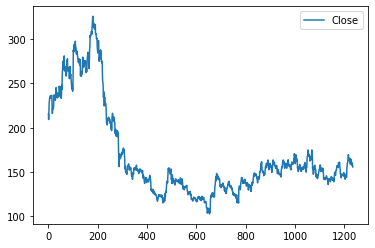

In [5]:
df[['Close']].plot()
plt.show()

Text(0.5, 1.0, 'stock Cumulative Returns')

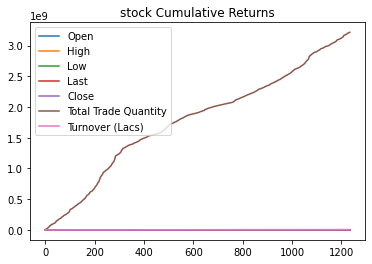

In [6]:
# Comulative Return
dr = df.cumsum()
dr.plot()
plt.title('stock Cumulative Returns')

Text(0.5, 1.0, 'stock Autocorrelation plot')

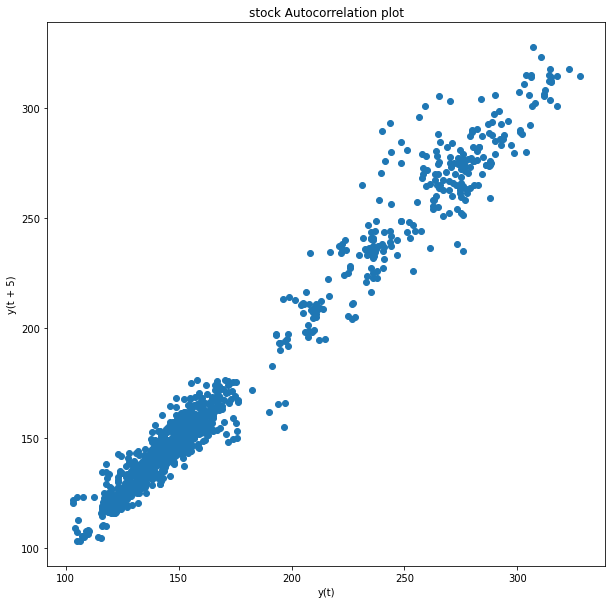

In [7]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('stock Autocorrelation plot')

In [8]:
df['Date'][1234]

'08-10-2013'

(371, 8)


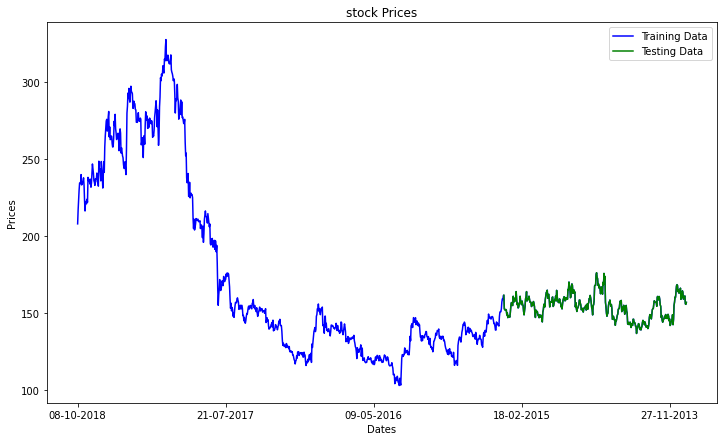

In [9]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
plt.figure(figsize=(12,7))
plt.title('stock Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1235, 300), df['Date'][0:1235:300])
plt.legend()
print(test_data.shape)

In [10]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [11]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values


history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 8.407
Symmetric mean absolute percentage error: 1.362


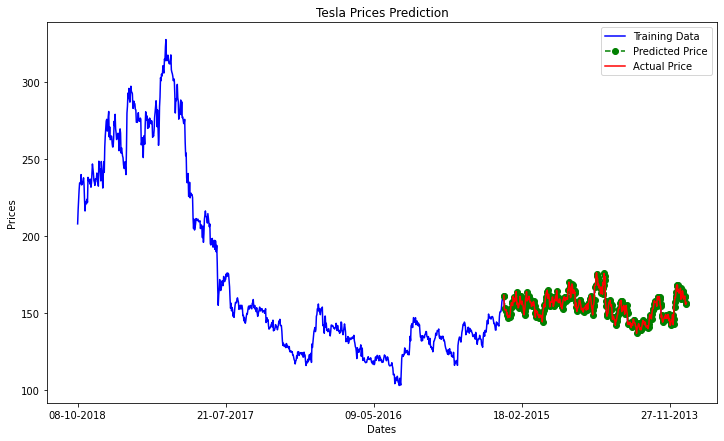

In [12]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('stock Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1235, 300), df['Date'][0:1235:300])
plt.legend()

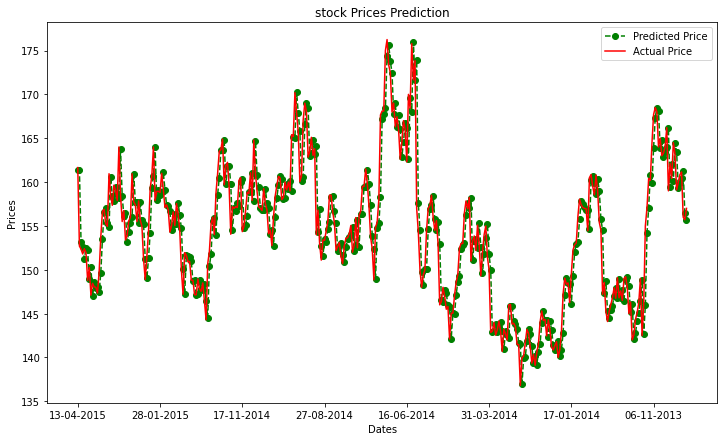

In [20]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(864,1235, 50), df['Date'][864:1235:50])
plt.title('stock Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()